## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
from scripts.function_utils import last_energy_points, predict_results, prepare_polynomial, normalize_training, split_train_test_timeseries, retrieve_selected_features

## Load Data

In [2]:
data = pd.read_excel("~/datasets/Dataset.xlsx", sheet_name=['Total Consumers'])
df = data['Total Consumers']
number_of_houses = len(df.columns)
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [3]:
df_total = pd.DataFrame(df.sum(axis=1))
df_total.columns = ['Energy']
df_total

,Energy
0,58.514142
1,57.575249
2,63.011688
3,62.735722
4,63.404029
...,...
35131,49.211311
35132,43.139892
35133,44.599341
35134,28.956084


#### Example of past timesteps

In [4]:
Xt, yt = last_energy_points(df_total, 3)
Xt

,Energy_1,Energy_2,Energy_3
0,63.011688,57.575249,58.514142
1,62.735722,63.011688,57.575249
2,63.404029,62.735722,63.011688
3,63.710440,63.404029,62.735722
4,50.544573,63.710440,63.404029
...,...,...,...
35128,62.642645,39.394640,42.250176
35129,49.211311,62.642645,39.394640
35130,43.139892,49.211311,62.642645
35131,44.599341,43.139892,49.211311


In [5]:
Xt_norm, _ = normalize_training(Xt)
Xt_norm

array([[0.36540976, 0.33113298, 0.33705271],
       [0.36366979, 0.36540976, 0.33113298],
       [0.36788347, 0.36366979, 0.36540976],
       ...,
       [0.24011798, 0.27839831, 0.36308294],
       [0.24931982, 0.24011798, 0.27839831],
       [0.15068901, 0.24931982, 0.24011798]])

In [6]:
yt

,Energy
0,62.735722
1,63.404029
2,63.710440
3,50.544573
4,49.966228
...,...
35128,49.211311
35129,43.139892
35130,44.599341
35131,28.956084


# Linear Regression

### Test for last 2 hours

In [7]:
number_of_past_timesteps = 8

In [8]:
metrics_list = []
full_start = time.time()
for i in range(1,number_of_past_timesteps+1):
    start = time.time()
    print("\nIteration ", i)
    
    X, y = last_energy_points(df_total, i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    
    X_train_norm, scaler = normalize_training(X_train)
    X_test_norm = scaler.transform(X_test)
    y_train, scaler2 = normalize_training(y_train, feat_range=(0,1))
    y_test = pd.DataFrame(scaler2.transform(y_test))

    mse, wape, r2 = predict_results(X_train_norm, X_test_norm, y_train, y_test, LinearRegression())
    metrics_list.append((mse,wape,r2))
    print("\nElapsed time: %.3f seconds" % (time.time() - start))
print("\nFull Elapsed time: %.3f seconds" % (time.time() - full_start))


Iteration  1
MSE: 0.0049
WAPE: 22.7329
R2: 0.7133

Elapsed time: 0.005 seconds

Iteration  2
MSE: 0.0047
WAPE: 22.6860
R2: 0.7111

Elapsed time: 0.005 seconds

Iteration  3
MSE: 0.0047
WAPE: 22.6053
R2: 0.7197

Elapsed time: 0.007 seconds

Iteration  4
MSE: 0.0047
WAPE: 22.3845
R2: 0.7160

Elapsed time: 0.008 seconds

Iteration  5
MSE: 0.0045
WAPE: 22.1675
R2: 0.7248

Elapsed time: 0.008 seconds

Iteration  6
MSE: 0.0047
WAPE: 22.6166
R2: 0.7269

Elapsed time: 0.009 seconds

Iteration  7
MSE: 0.0047
WAPE: 22.5569
R2: 0.7175

Elapsed time: 0.010 seconds

Iteration  8
MSE: 0.0046
WAPE: 22.3029
R2: 0.7195

Elapsed time: 0.010 seconds

Full Elapsed time: 0.063 seconds


In [9]:
mse_list = []
wape_list = []
r2_list = []

for i in range(0,number_of_past_timesteps):
    mse_list.append(metrics_list[i][0])
    wape_list.append(metrics_list[i][1])
    r2_list.append(metrics_list[i][2])

### Test with selected features

In [10]:
selected_feats = [1,2,3,4,96,192,288,384,480,576,672]
X, y = retrieve_selected_features(df_total, selected_feats, "2019-01-01")
X

,Energy_1,Energy_2,Energy_3,Energy_4,Energy_96,Energy_192,Energy_288,Energy_384,Energy_480,Energy_576,Energy_672,DayOfWeek,Hour
0,38.278531,38.628977,38.839654,44.382711,48.364872,48.538718,40.712278,36.662929,31.945785,75.988362,58.514142,1,0
1,38.397391,38.278531,38.628977,38.839654,40.274774,47.418432,46.100805,81.363050,23.446777,73.248235,57.575249,1,0
2,38.792453,38.397391,38.278531,38.628977,28.697146,37.193773,54.376195,78.709251,38.944959,29.228225,63.011688,1,0
3,30.128606,38.792453,38.397391,38.278531,22.915192,34.490140,64.623770,56.382871,37.884477,26.668414,62.735722,1,0
4,30.302314,30.128606,38.792453,38.397391,29.355591,31.813957,48.110088,49.807681,33.570631,22.221842,63.404029,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,62.642645,39.394640,42.250176,46.691361,59.032763,80.316627,75.361542,92.334276,81.677459,103.144263,101.276378,2,22
34460,49.211311,62.642645,39.394640,42.250176,61.748938,67.160737,59.359141,90.230524,77.101105,81.344948,97.925796,2,23
34461,43.139892,49.211311,62.642645,39.394640,68.822483,88.889336,53.868931,96.738202,82.461973,81.732987,106.449744,2,23
34462,44.599341,43.139892,49.211311,62.642645,52.902303,79.841367,45.128295,80.209222,61.289891,56.174453,109.448934,2,23


In [11]:
y

0        38.397391
1        38.792453
2        30.128606
3        30.302314
4        33.274138
           ...    
34459    49.211311
34460    43.139892
34461    44.599341
34462    28.956084
34463    25.944837
Name: Energy, Length: 34464, dtype: float64

In [12]:
metrics_list_sel = []
selected_features = [1,2,3,4,96,192,288,384,480,576,672]
start = time.time()
X, y = retrieve_selected_features(df_total, selected_features, "2019-01-01")
X_train, X_test, y_train, y_test = split_train_test_timeseries(X, y, train_size=0.8)

X_train_norm, scaler = normalize_training(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm, scaler2 = normalize_training(pd.DataFrame(y_train), feat_range=(0,1))
y_test_norm = pd.DataFrame(scaler2.transform(pd.DataFrame(y_test)))

mse, wape, r2 = predict_results(X_train_norm, X_test_norm, y_train_norm, y_test_norm, LinearRegression())
metrics_list_sel.append((mse,wape,r2))
print("\nElapsed time: %.3f seconds" % (time.time() - start))

MSE: 0.0056
WAPE: 21.2061
R2: 0.7600

Elapsed time: 0.023 seconds


## Plot performance metrics

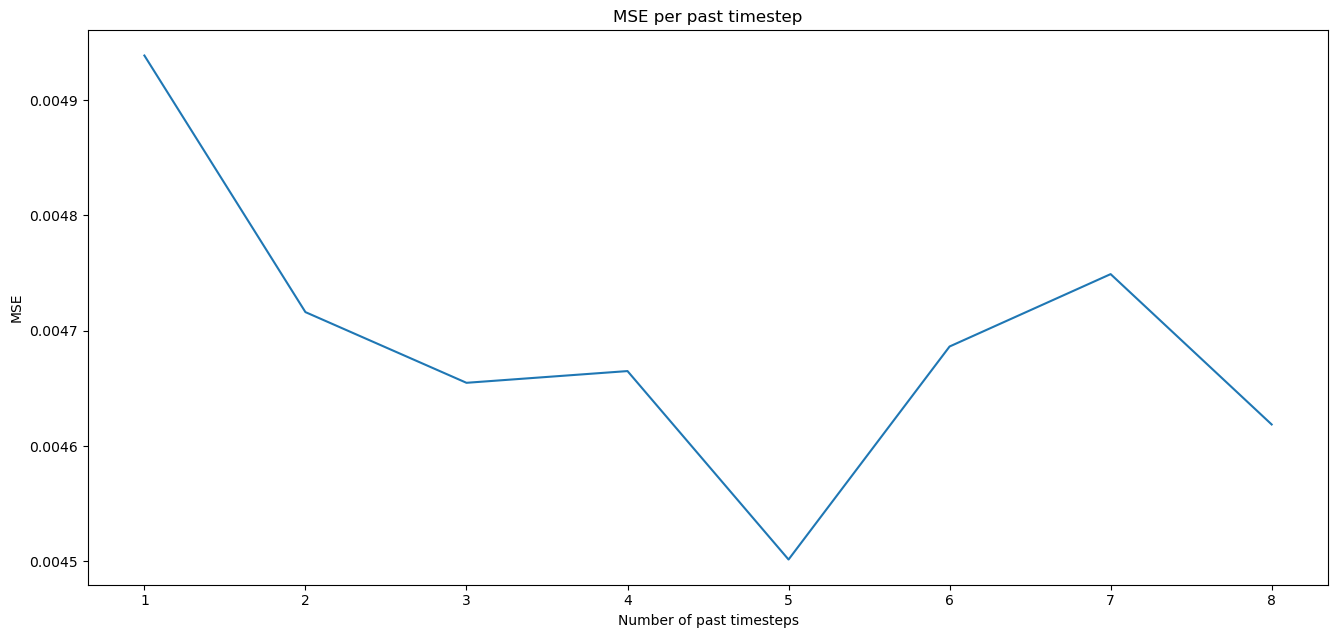

In [13]:
plt.figure(figsize=(16, 7.2))
plt.plot(range(1,number_of_past_timesteps+1), mse_list)
plt.title('MSE per past timestep')
plt.xlabel('Number of past timesteps')
plt.ylabel('MSE')
plt.show()

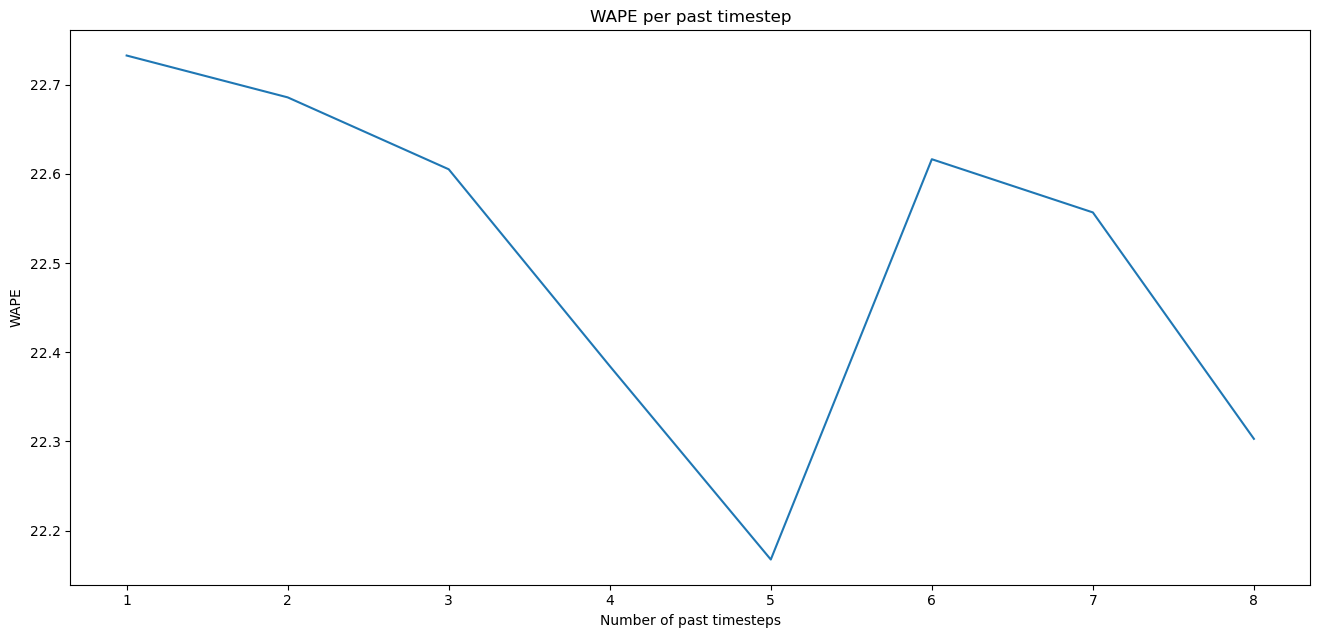

In [14]:
plt.figure(figsize=(16, 7.2))
plt.plot(range(1,number_of_past_timesteps+1), wape_list)
plt.title('WAPE per past timestep')
plt.xlabel('Number of past timesteps')
plt.ylabel('WAPE')
plt.show()

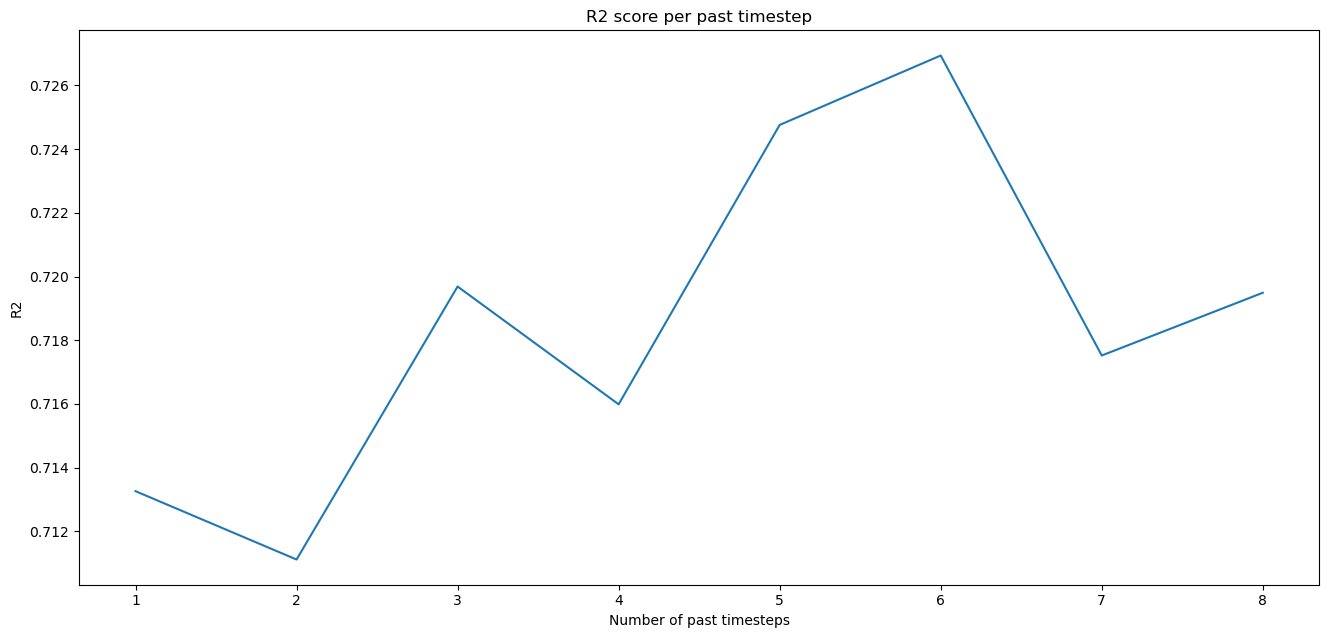

In [15]:
plt.figure(figsize=(16, 7.2))
plt.plot(range(1,number_of_past_timesteps+1), r2_list)
plt.title('R2 score per past timestep')
plt.xlabel('Number of past timesteps')
plt.ylabel('R2')
plt.show()

# Polynomial Regression

### Test for last 8 energy points (2 hours) degree 2, 3 and 4

In [16]:
degree_list = []
full_start = time.time()
for degree in range(2,5):
    metrics_list = []
    print("\n\t\tDegree ", degree)
    for i in range(1,number_of_past_timesteps+1):
        start = time.time()
        print("\nIteration ", i)
        X, y = last_energy_points(df_total, i)
        X_train, X_test, y_train, y_test = prepare_polynomial(X, y, deg=degree)
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        X_train_norm, scaler = normalize_training(X_train)
        X_test_norm = scaler.transform(X_test)
        y_train_norm, scaler2 = normalize_training(y_train)
        y_test_norm = pd.DataFrame(scaler2.transform(y_test))
        
        mse, wape, r2 = predict_results(X_train_norm, X_test_norm, y_train_norm, y_test_norm, LinearRegression())
        print()
        metrics_list.append((mse,wape,r2))      
        print("\nElapsed time: %.3f seconds" % (time.time() - start))
    degree_list.append(metrics_list)
print("\nFull Elapsed time: %.3f seconds" % (time.time() - full_start))


		Degree  2

Iteration  1
(28108, 2) (7027, 2) (28108, 1) (7027, 1)
MSE: 0.0046
WAPE: 22.7283
R2: 0.7077


Elapsed time: 0.009 seconds

Iteration  2
(28107, 5) (7027, 5) (28107, 1) (7027, 1)
MSE: 0.0046
WAPE: 22.9755
R2: 0.7229


Elapsed time: 0.011 seconds

Iteration  3
(28106, 9) (7027, 9) (28106, 1) (7027, 1)
MSE: 0.0047
WAPE: 22.4808
R2: 0.7243


Elapsed time: 0.013 seconds

Iteration  4
(28105, 14) (7027, 14) (28105, 1) (7027, 1)
MSE: 0.0046
WAPE: 22.4636
R2: 0.7297


Elapsed time: 0.016 seconds

Iteration  5
(28104, 20) (7027, 20) (28104, 1) (7027, 1)
MSE: 0.0044
WAPE: 22.1218
R2: 0.7341


Elapsed time: 0.020 seconds

Iteration  6
(28104, 27) (7026, 27) (28104, 1) (7026, 1)
MSE: 0.0044
WAPE: 21.9522
R2: 0.7303


Elapsed time: 0.025 seconds

Iteration  7
(28103, 35) (7026, 35) (28103, 1) (7026, 1)
MSE: 0.0044
WAPE: 21.8413
R2: 0.7312


Elapsed time: 0.029 seconds

Iteration  8
(28102, 44) (7026, 44) (28102, 1) (7026, 1)
MSE: 0.0046
WAPE: 22.3837
R2: 0.7261


Elapsed time: 0.036 s

In [18]:
p_mse_list = []
p_wape_list = []
p_r2_list = []

for j in range(0,3):
    mse_l = []
    wape_l = []
    r2_l = []
    
    for i in range(0,number_of_past_timesteps):
        mse_l.append(degree_list[j][i][0])
        wape_l.append(degree_list[j][i][1])
        r2_l.append(degree_list[j][i][2])
    p_mse_list.append(mse_l)
    p_wape_list.append(wape_l)
    p_r2_list.append(r2_l)

## Comparison between Linear and Polynomial

Text(0, 0.5, 'MSE')

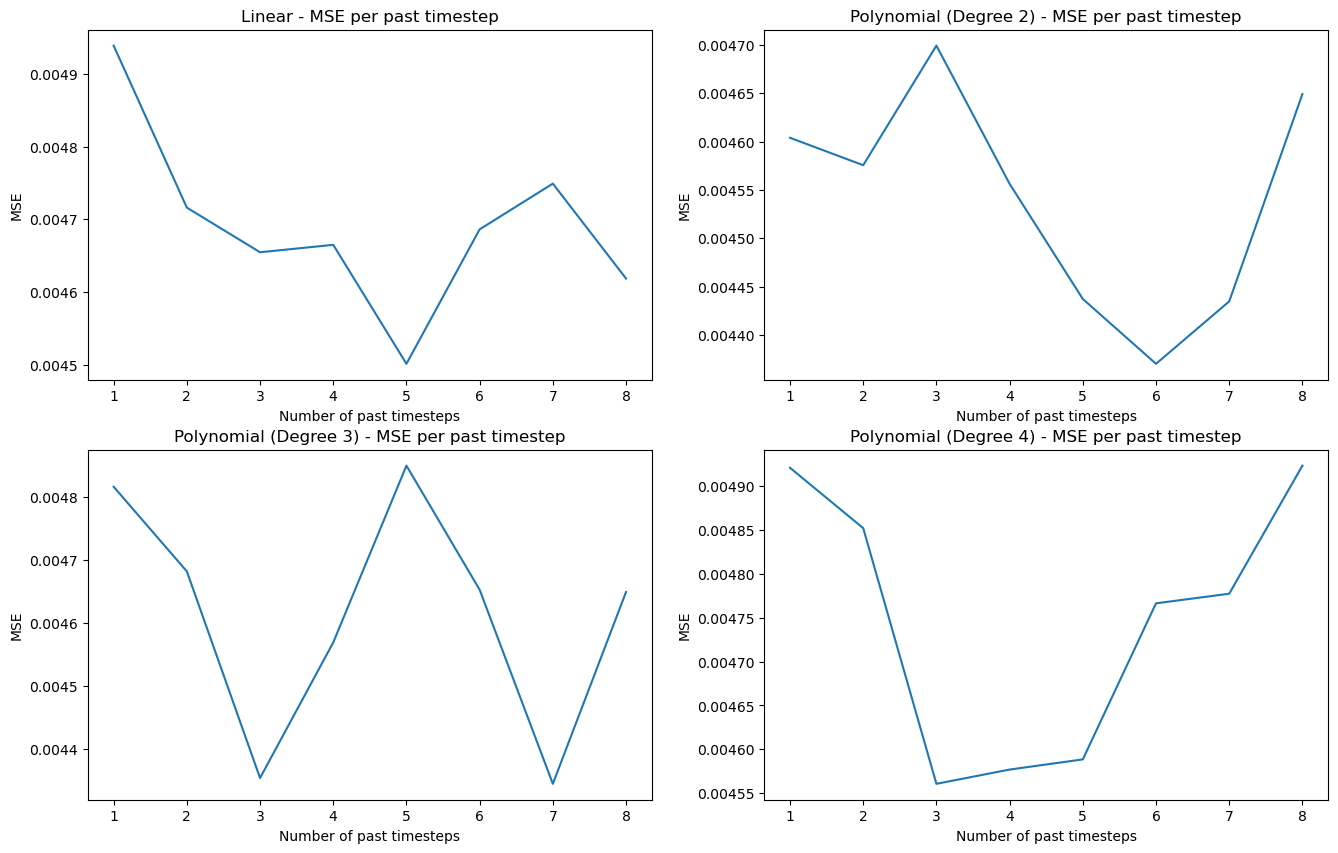

In [19]:
figure, axis = plt.subplots(2, 2, figsize=(16,10))
axis[0,0].plot(range(1,number_of_past_timesteps+1), mse_list)
axis[0,0].set_title("Linear - MSE per past timestep")
axis[0,0].set_xlabel("Number of past timesteps")
axis[0,0].set_ylabel("MSE")
  
axis[0,1].plot(range(1,number_of_past_timesteps+1), p_mse_list[0])
axis[0,1].set_title("Polynomial (Degree 2) - MSE per past timestep")
axis[0,1].set_xlabel("Number of past timesteps")
axis[0,1].set_ylabel("MSE")

axis[1,0].plot(range(1,number_of_past_timesteps+1), p_mse_list[1])
axis[1,0].set_title("Polynomial (Degree 3) - MSE per past timestep")
axis[1,0].set_xlabel("Number of past timesteps")
axis[1,0].set_ylabel("MSE")

axis[1,1].plot(range(1,number_of_past_timesteps+1), p_mse_list[2])
axis[1,1].set_title("Polynomial (Degree 4) - MSE per past timestep")
axis[1,1].set_xlabel("Number of past timesteps")
axis[1,1].set_ylabel("MSE")

Text(0, 0.5, 'WAPE')

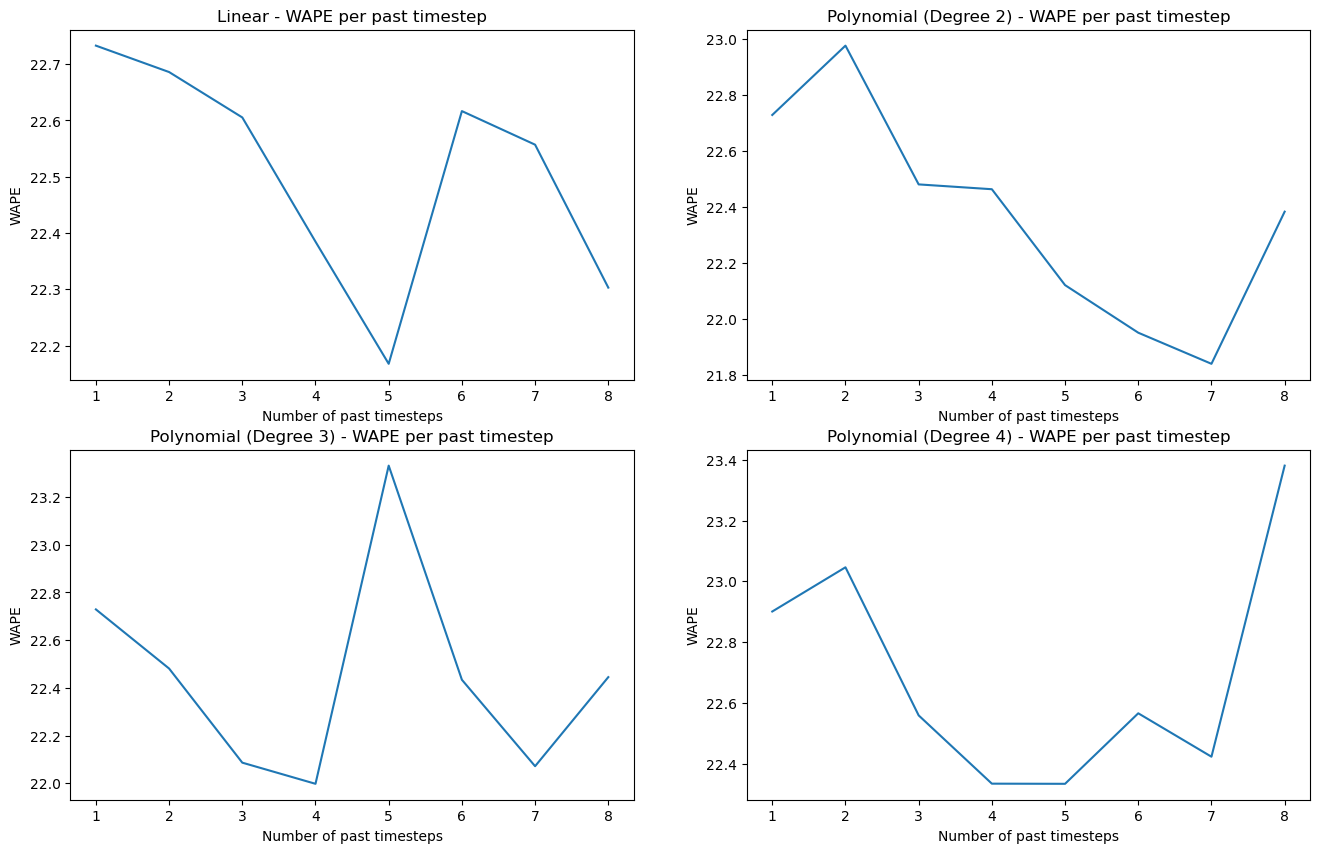

In [20]:
figure, axis = plt.subplots(2, 2, figsize=(16,10))
axis[0,0].plot(range(1,number_of_past_timesteps+1), wape_list)
axis[0,0].set_title("Linear - WAPE per past timestep")
axis[0,0].set_xlabel("Number of past timesteps")
axis[0,0].set_ylabel("WAPE")
  
axis[0,1].plot(range(1,number_of_past_timesteps+1), p_wape_list[0])
axis[0,1].set_title("Polynomial (Degree 2) - WAPE per past timestep")
axis[0,1].set_xlabel("Number of past timesteps")
axis[0,1].set_ylabel("WAPE")

axis[1,0].plot(range(1,number_of_past_timesteps+1), p_wape_list[1])
axis[1,0].set_title("Polynomial (Degree 3) - WAPE per past timestep")
axis[1,0].set_xlabel("Number of past timesteps")
axis[1,0].set_ylabel("WAPE")

axis[1,1].plot(range(1,number_of_past_timesteps+1), p_wape_list[2])
axis[1,1].set_title("Polynomial (Degree 4) - WAPE per past timestep")
axis[1,1].set_xlabel("Number of past timesteps")
axis[1,1].set_ylabel("WAPE")

Text(0, 0.5, 'R2 score')

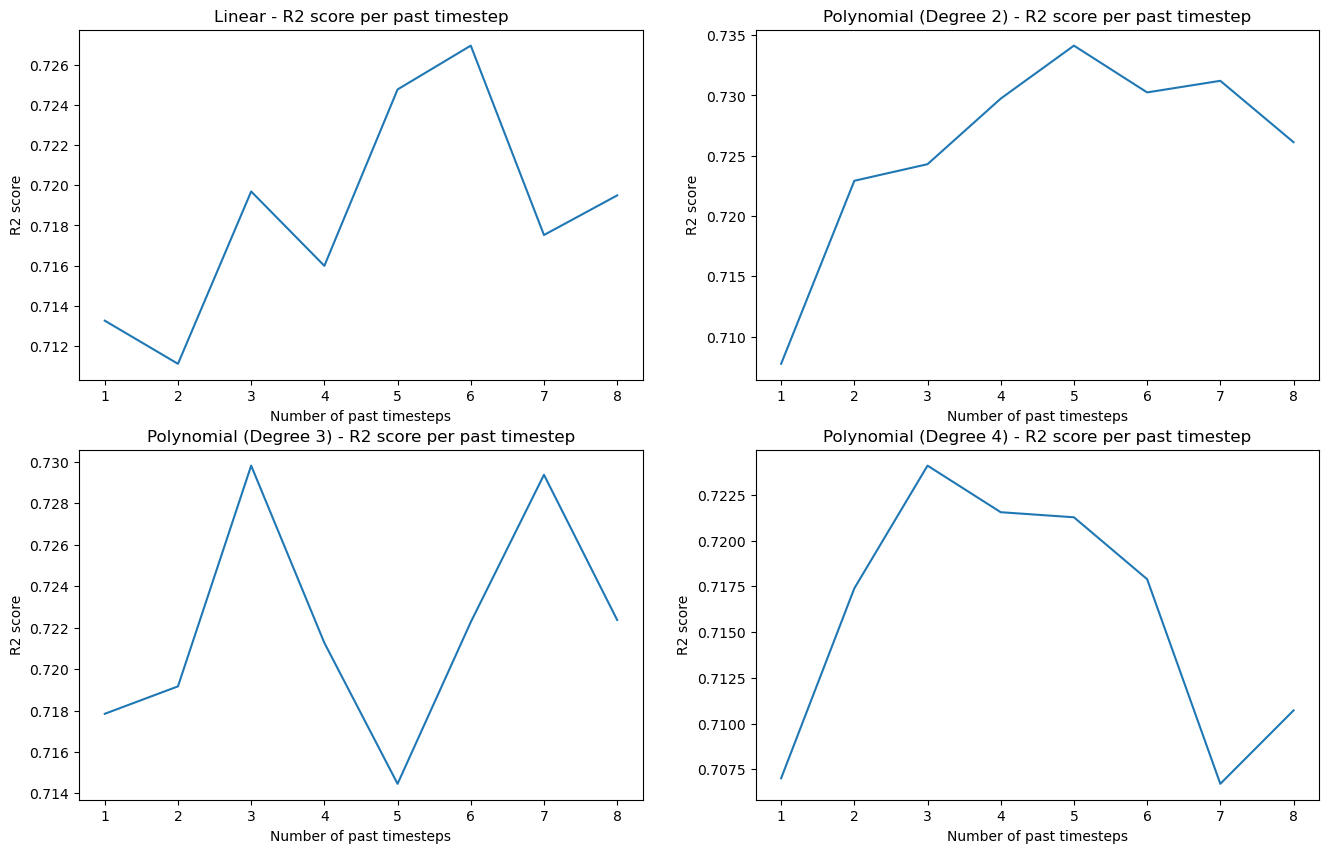

In [21]:
figure, axis = plt.subplots(2, 2, figsize=(16,10))
axis[0,0].plot(range(1,number_of_past_timesteps+1), r2_list)
axis[0,0].set_title("Linear - R2 score per past timestep")
axis[0,0].set_xlabel("Number of past timesteps")
axis[0,0].set_ylabel("R2 score")
  
axis[0,1].plot(range(1,number_of_past_timesteps+1), p_r2_list[0])
axis[0,1].set_title("Polynomial (Degree 2) - R2 score per past timestep")
axis[0,1].set_xlabel("Number of past timesteps")
axis[0,1].set_ylabel("R2 score")

axis[1,0].plot(range(1,number_of_past_timesteps+1), p_r2_list[1])
axis[1,0].set_title("Polynomial (Degree 3) - R2 score per past timestep")
axis[1,0].set_xlabel("Number of past timesteps")
axis[1,0].set_ylabel("R2 score")

axis[1,1].plot(range(1,number_of_past_timesteps+1), p_r2_list[2])
axis[1,1].set_title("Polynomial (Degree 4) - R2 score per past timestep")
axis[1,1].set_xlabel("Number of past timesteps")
axis[1,1].set_ylabel("R2 score")